In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

<div style="text-align:center; background-color:#dc3545; padding:20px;">
  <h1 style="font-size:36px; color:#ffeeba;"><b>1.EDA (Explotary Data Analysis)</b></h1>
</div>


In [4]:
df = pd.read_csv(r'F:\Data Science Projects\Text Document Classification\data\df_file.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    2225 non-null   object
 1   Label   2225 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.9+ KB


In [6]:
df.tail(20)

,Text,Label
2205,Barclays profits hit record level\n \n Barclay...,4
2206,Asian banks halt dollar's slide\n \n The dolla...,4
2207,Venezuela and China sign oil deal\n \n Venezue...,4
2208,UK homes hit Â£3.3 trillion total\n \n The val...,4
2209,China's Shanda buys stake in Sina\n \n Chinese...,4
2210,EU 'too slow' on economic reforms\n \n Most EU...,4
2211,Economy 'strong' in election year\n \n UK busi...,4
2212,Saab to build Cadillacs in Sweden\n \n General...,4
2213,Bad weather hits Nestle sales\n \n A combinati...,4
2214,US Ahold suppliers face charges\n \n US prosec...,4


In [7]:
df['Label'].unique()

array([0, 1, 2, 3, 4])

In [8]:
df['Label'].value_counts()

Label
1    511
4    510
0    417
2    401
3    386
Name: count, dtype: int64

C:\Users\LENOVO  LS\AppData\Local\Temp\ipykernel_9392\2784532637.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Label', palette='BuPu')


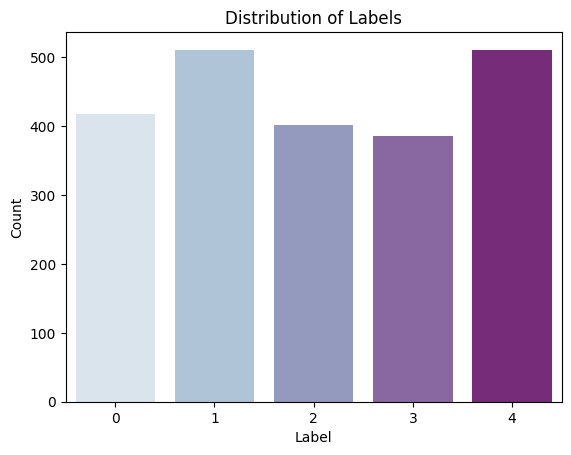

In [9]:
sns.countplot(data=df, x='Label', palette='BuPu')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()

In [10]:
text = df['Text']
label = df['Label']

<div style="text-align:center; background-color:#dc3545; padding:20px;">
  <h1 style="font-size:36px; color:#ffeeba;"><b>2.Text Preprocessing</b></h1>
</div>


In [11]:
import re
def clean(text):
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    text = text.lower()
    text = re.sub(r"\s+", " ", text).strip()
    return text

In [12]:
text = text.apply(clean)

In [13]:
text

0       budget to set scene for election gordon brown ...
1       army chiefs in regiments decision military chi...
2       howard denies split over id cards michael howa...
3       observers to monitor uk election ministers wil...
4       kilroy names election seat target exchat show ...
                              ...                        
2220    india opens skies to competition india will al...
2221    yukos bankruptcy not us matter russian authori...
2222    survey confirms property slowdown government f...
2223    high fuel prices hit bas profits british airwa...
2224    us trade gap hits record in 2004 the gap betwe...
Name: Text, Length: 2225, dtype: object

# Removing Stopwords

In [14]:
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\LENOVO
[nltk_data]     LS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [15]:
def remove_stopwrods(text):
    filtered = ' '.join(word for word in text.split() if word not in stop_words)
    return filtered

In [16]:
text = text.apply(remove_stopwrods)

# Tokenization, Lemmatizationm, Stemming

In [17]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer


# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
import nltk
nltk.download('punkt_tab')
# Initialize lemmatizer and stemmer
def tokenize(text): # tokenize text into words
    ans = word_tokenize(text)
    return ans

def stemmer(text): # apply stemming on text
    stemmer_instance = PorterStemmer()
    ans = [stemmer_instance.stem(word) for word in text]
    return ans

def lemmatizer(text): # apply lemmatization on text
    ans = [WordNetLemmatizer().lemmatize(word) for word in text]
    return ans

[nltk_data] Downloading package punkt to C:\Users\LENOVO
[nltk_data]     LS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to C:\Users\LENOVO
[nltk_data]     LS\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt_tab to C:\Users\LENOVO
[nltk_data]     LS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


In [18]:
text = text.apply(lambda x: tokenize(x)) # text tokenization: transform text into words

In [19]:
text = text.apply(lambda x: lemmatizer(x)) # text lemmatization: transform words into root words example: running -> run

In [20]:
text = text.apply(lambda x: stemmer(x)) 

In [21]:
text = text.apply(lambda x: ' '.join(x))

# Splitting the Dataset

In [22]:
x_train, x_test, y_train, y_test = train_test_split(text, label, test_size= 0.2, random_state=42)
(x_train.shape, x_test.shape)

((1780,), (445,))

<div style="text-align:center; background-color:#dc3545; padding:20px;">
  <h1 style="font-size:36px; color:#ffeeba;"><b>3.Pipeline</b></h1>
</div>


---
## **Use the count victorerizer with NB**
---

In [23]:
cnt_vect = CountVectorizer()
xcnt = cnt_vect.fit_transform(text)

In [24]:
from sklearn.naive_bayes import MultinomialNB
# CountVectorizer model training
pipeline_cnt = Pipeline([
    ('vect', CountVectorizer()),
    ('nb', MultinomialNB())
])
pipeline_cnt.fit(x_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('nb', MultinomialNB())])

In [25]:
y_pred_cnt = pipeline_cnt.predict(x_test)

In [26]:
# Count Vector accuracy
print("Accuracy of Count Vector:",accuracy_score(y_test, y_pred_cnt))

Accuracy of Count Vector: 0.9730337078651685


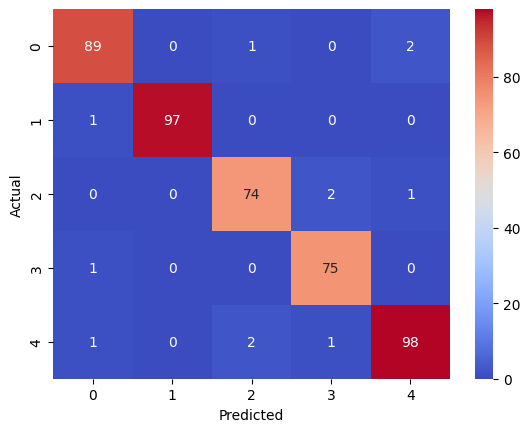

In [27]:
# Create a heatmap to show the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_cnt)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


---
## **Use the count victorerizer with NB using N-Grams**
---

In [28]:
# N-Gram 1,2
vectorizer_1_2 = CountVectorizer(ngram_range=(1, 2)) # N-Gram 1,2 has a Unigrams  and Bigrams ["hello", "world", "hello world"]
x_1_2 = vectorizer_1_2.fit_transform(text)
# N-Gram 2,2
vectorizer_2_2 = CountVectorizer(ngram_range=(2, 2))# N-Gram 2,2 has a Bigrams ["hello world"]
x_2_2 = vectorizer_2_2.fit_transform(text)
# N-Gram 3,3
vectorizer_3_3 = CountVectorizer(ngram_range=(3, 3))
x_3_3 = vectorizer_3_3.fit_transform(text)

In [29]:
# N-Gram 1,2 model training
pipeline_1_2 = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1, 2))),
    ('nb', MultinomialNB())
])
pipeline_1_2.fit(x_train, y_train)

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('nb', MultinomialNB())])

In [30]:
# N-Gram 2,2 model training
pipeline_2_2 = Pipeline([
    ('vect', CountVectorizer(ngram_range=(2, 2))),
    ('nb', MultinomialNB())
])
pipeline_2_2.fit(x_train, y_train)

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(2, 2))),
                ('nb', MultinomialNB())])

In [31]:
# N-Gram 3,3 model training
pipeline_3_3 = Pipeline([
    ('vect', CountVectorizer(ngram_range=(3, 3))),
    ('nb', MultinomialNB())
])
pipeline_3_3.fit(x_train, y_train)

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(3, 3))),
                ('nb', MultinomialNB())])

In [32]:
y_pred_1_2 = pipeline_1_2.predict(x_test)
y_pred_2_2 = pipeline_2_2.predict(x_test)
y_pred_3_3 = pipeline_3_3.predict(x_test)

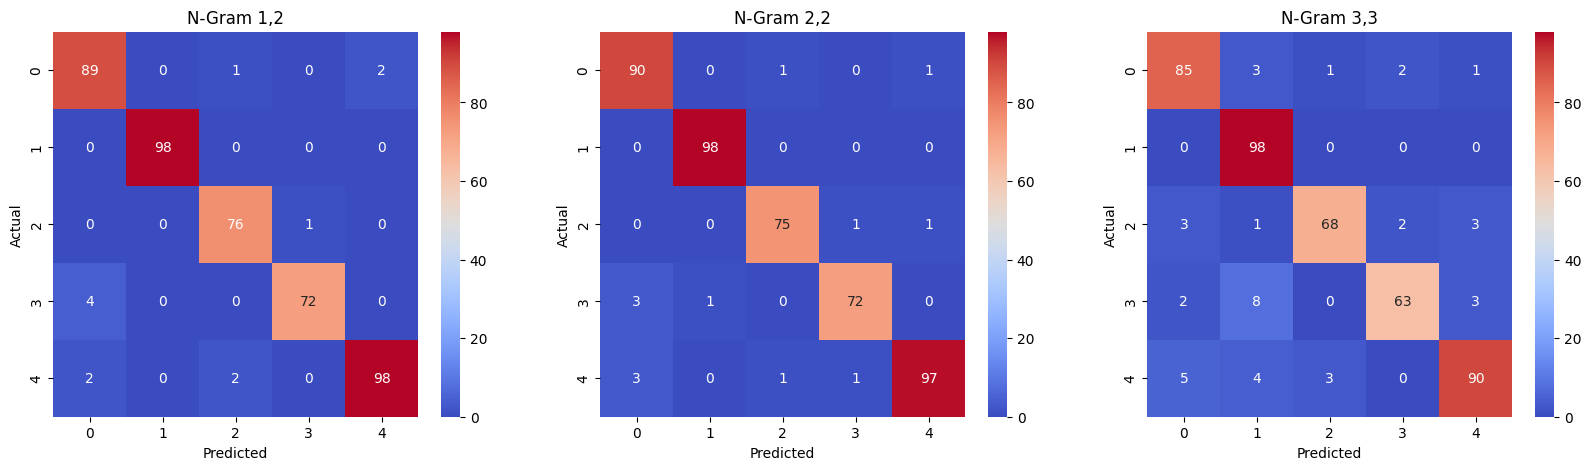

In [33]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.heatmap(pd.crosstab(y_test, y_pred_1_2, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap='coolwarm', ax=ax[0])
sns.heatmap(pd.crosstab(y_test, y_pred_2_2, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap='coolwarm', ax=ax[1])
sns.heatmap(pd.crosstab(y_test, y_pred_3_3, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap='coolwarm', ax=ax[2])
ax[0].title.set_text('N-Gram 1,2')
ax[1].title.set_text('N-Gram 2,2')
ax[2].title.set_text('N-Gram 3,3')
plt.show()


In [34]:
print("Accuracy of N-Gram 1, 2:", accuracy_score(y_test, y_pred_1_2))
print("Accuracy of N-Gram 2, 2:", accuracy_score(y_test, y_pred_2_2))
print("Accuracy of N-Gram 3, 3:", accuracy_score(y_test, y_pred_3_3))

Accuracy of N-Gram 1, 2: 0.9730337078651685
Accuracy of N-Gram 2, 2: 0.9707865168539326
Accuracy of N-Gram 3, 3: 0.9078651685393259


---
## **Use the TF-IDF victorerizer with NB**
---


In [35]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3)) # tfidf (text frequency inverse document frequency) gets the importance of the word in the document
# example: "the" is not important in the document because it is in every document
# example: "apple" is important in the document because it is not in every document
x_tfidf = tfidf_vectorizer.fit_transform(text)

In [36]:
# TF-IDF model training
pipeline_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=500)),
    ('nb', MultinomialNB())
])
pipeline_tfidf.fit(x_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=500, ngram_range=(1, 2))),
                ('nb', MultinomialNB())])

In [37]:
y_pred_rf = pipeline_tfidf.predict(x_test)

In [38]:
print("Accuracy of TF-IDF:", accuracy_score(y_test, y_pred_rf))

Accuracy of TF-IDF: 0.9325842696629213


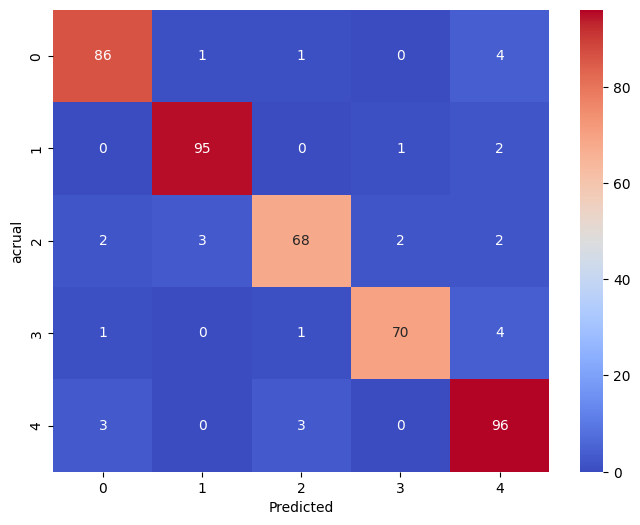

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('acrual')
plt.show()

<div style="text-align:center; background-color:#dc3545; padding:20px;">
  <h1 style="font-size:36px; color:#ffeeba;"><b>4.Evaluation</b></h1>
</div>


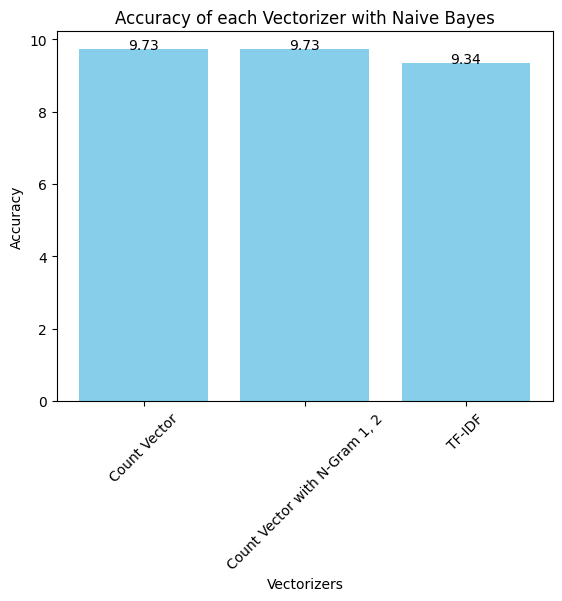

In [40]:
models = ['Count Vector', 'Count Vector with N-Gram 1, 2', 'TF-IDF']
accuracy = [9.73, 9.73, 9.34]
plt.bar(models, accuracy, color='skyblue')
for i in range(len(models)):
    plt.text(i, accuracy[i], accuracy[i], ha='center')
plt.xlabel('Vectorizers')
plt.ylabel('Accuracy')
plt.title('Accuracy of each Vectorizer with Naive Bayes')
plt.xticks(rotation=45)
plt.show()


---
*Final Model*
---

---

In [41]:
vectorizer = CountVectorizer(ngram_range=(1, 2)) # N-Gram 1,2 has a Unigrams  and Bigrams ["hello", "world", "hello world"]
x_1_2 = vectorizer_1_2.fit_transform(text)

pipeline = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1, 2))),
    ('nb', MultinomialNB())
])
pipeline.fit(x_train, y_train)

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('nb', MultinomialNB())])

In [42]:
y_pred = pipeline.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        92
           1       1.00      1.00      1.00        98
           2       0.96      0.99      0.97        77
           3       0.99      0.95      0.97        76
           4       0.98      0.96      0.97       102

    accuracy                           0.97       445
   macro avg       0.97      0.97      0.97       445
weighted avg       0.97      0.97      0.97       445



In [43]:
# predict the label of the text
txt = "South Africa sweep top awards \n South Africa's Schalk Burger was named player of the year as the Tri-Nations champions swept the top honours at the International Rugby Board's awards.\n The flanker topped a list which included Ireland star Gordon D'Arcy and Australian sensation Matt Giteau. Jake White claimed the coaching award while his side held off Grand Slam winners France to take the team award. England player Simon Amor beat team-mate Ben Gollings and Argentine Lucio Lopez Fleming to win the sevens award. Burger's award came just a week after he won the equivalent prize from his fellow international players and White, who also coached Burger at under-21 level, paid tribute to him. ""Schalk's emergence as a major force has meant a lot to South African rugby, but has also influenced world rugby,"" said White. ""He's become to South African rugby what Jonty Rhodes was to South African cricket. It's amazing what he has achieved in such a short time so far in his international career."" Amor, who will captain England in this season's opening IRB Sevens tournament, the Dubai Sevens, which start on Thursday, was delighted with his award. ""There are so many great sevens players on the circuit at the moment that this is a genuine honour,"" said the Gloucester fly-half."

txt = clean(txt) 
txt = remove_stopwrods(txt)
txt = tokenize(txt)
txt = lemmatizer(txt)
txt = stemmer(txt)
txt = ' '.join(txt)

# predict the label
pred = pipeline.predict([txt])

In [44]:
dict_label = {0: 'Politics', 1: 'Sport', 2: 'Technology', 3: 'Entertainment', 4: 'Business'}
print("Text:", txt)
print("-"*30)
print("Predicted Label:", dict_label[int(pred[0])])
print("-"*30)

Text: south africa sweep top award south africa schalk burger name player year trinat champion swept top honour intern rugbi board award flanker top list includ ireland star gordon darci australian sensat matt giteau jake white claim coach award side held grand slam winner franc take team award england player simon amor beat teammat ben goll argentin lucio lopez fleme win seven award burger award came week equival prize fellow intern player white also coach burger under21 level paid tribut schalk emerg major forc meant lot south african rugbi also influenc world rugbi said white he becom south african rugbi jonti rhode south african cricket amaz achiev short time far intern career amor captain england season open irb seven tournament dubai seven start thursday delight award mani great seven player circuit moment genuin honour said gloucest flyhalf
------------------------------
Predicted Label: Sport
------------------------------
